In [ ]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px


# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing 1 file
y, sr = librosa.load('/content/AIR CONDITIONER.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [ 0.01805962  0.07724793  0.06743623 ... -0.01550418  0.02847124
  0.05224839] 

y shape: (88200,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 4.0


In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.01805962  0.07724793  0.06743623 ... -0.01550418  0.02847124
  0.05224839] 

Audio File shape: (88200,)


In [ ]:
# Importing the 10 files

#AIRCONDITIONER
AIRCONDITIONER= ('/content/AIR CONDITIONER.wav')
y_AIRCONDITIONER, sr_AIRCONDITIONER = librosa.load(AIRCONDITIONER)
audio_AIRCONDITIONER, _ = librosa.effects.trim(y_AIRCONDITIONER)

#DOGBARK
DOGBARK= ('/content/DOG BARK.wav')
y_DOGBARK, sr_DOGBARK = librosa.load(DOGBARK)
audio_DOGBARK, _ = librosa.effects.trim(y_DOGBARK)

#DRILLING
DRILLING= ('/content/DRILLING.wav')
y_DRILLING, sr_DRILLING = librosa.load(DRILLING)
audio_DRILLING, _ = librosa.effects.trim(y_DRILLING)

#GUNSHOT
GUNSHOT= ('/content/GUN SHOT.wav')
y_GUNSHOT, sr_GUNSHOT = librosa.load(GUNSHOT)
audio_GUNSHOT, _ = librosa.effects.trim(y_GUNSHOT)

#STREETMUSIC
STREETMUSIC= ('/content/STREET MUSIC.wav')
y_STREETMUSIC, sr_STREETMUSIC = librosa.load(STREETMUSIC)
audio_STREETMUSIC, _ = librosa.effects.trim(y_STREETMUSIC)


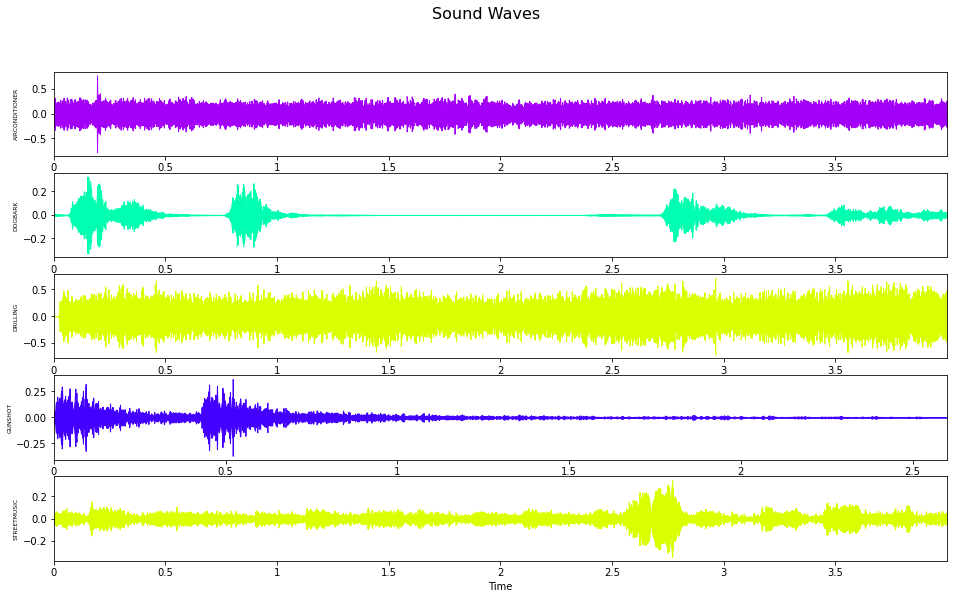

In [ ]:
#REPRESENTATION OF 2D SIGNAL
sound_sample_list = ["AIRCONDITIONER", "DOGBARK", "DRILLING","GUNSHOT","STREETMUSIC"]

fig, ax = plt.subplots(5, figsize = (16, 9))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveplot(y = audio_AIRCONDITIONER, sr = sr_AIRCONDITIONER, color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_DOGBARK, sr = sr_DOGBARK, color = "#00FFB0", ax=ax[1])
librosa.display.waveplot(y = audio_DRILLING, sr = sr_DRILLING, color = "#D9FF00", ax=ax[2])
librosa.display.waveplot(y = audio_GUNSHOT, sr = sr_GUNSHOT, color = "#4300FF", ax=ax[3])
librosa.display.waveplot(y = audio_STREETMUSIC, sr = sr_STREETMUSIC, color = "#D9FF00", ax=ax[4]);


for i, name in zip(range(5), sound_sample_list):
    ax[i].set_ylabel(name, fontsize=6)

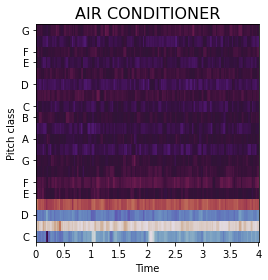

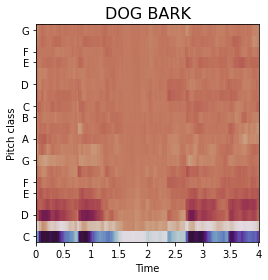

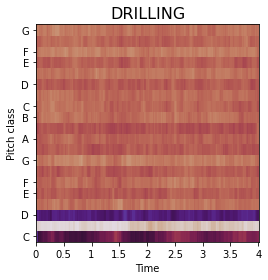

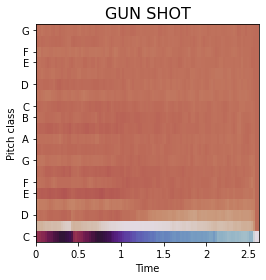

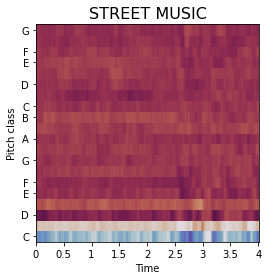

In [ ]:
#8. MFCC REPRESENTATION
# Increase or decrease hop_length to change how granular you want your data to be

# Chromogram 


n_fft = 2048 # FFT window size
hop_length = 512


chromagram = librosa.feature.mfcc(audio_AIRCONDITIONER, sr=sr_AIRCONDITIONER, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("AIR CONDITIONER", fontsize=16);

chromagram = librosa.feature.mfcc(audio_DOGBARK, sr=sr_DOGBARK, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("DOG BARK", fontsize=16);

chromagram = librosa.feature.mfcc(audio_DRILLING, sr=sr_DRILLING, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("DRILLING", fontsize=16);

chromagram = librosa.feature.mfcc(audio_GUNSHOT, sr=sr_GUNSHOT, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("GUN SHOT", fontsize=16);

chromagram = librosa.feature.mfcc(audio_STREETMUSIC, sr=sr_STREETMUSIC, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("STREET MUSIC", fontsize=16);



In [ ]:
#FOURIER TRANSFORM
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_AIRCONDITIONER = np.abs(librosa.stft(audio_AIRCONDITIONER, n_fft = n_fft, hop_length = hop_length))
D_DOGBARK = np.abs(librosa.stft(audio_DOGBARK, n_fft = n_fft, hop_length = hop_length))
D_DRILLING = np.abs(librosa.stft(audio_DRILLING, n_fft = n_fft, hop_length = hop_length))
D_GUNSHOT = np.abs(librosa.stft(audio_GUNSHOT, n_fft = n_fft, hop_length = hop_length))
D_STREETMUSIC = np.abs(librosa.stft(audio_STREETMUSIC, n_fft = n_fft, hop_length = hop_length))

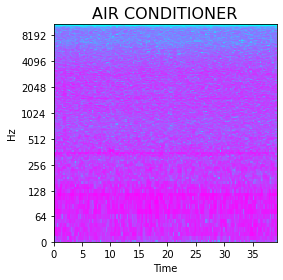

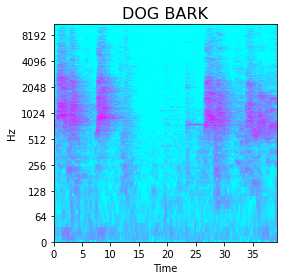

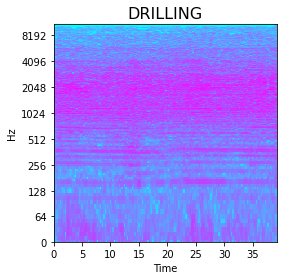

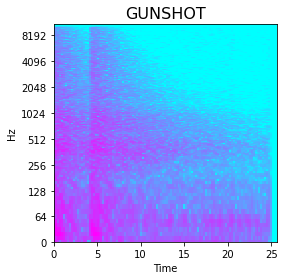

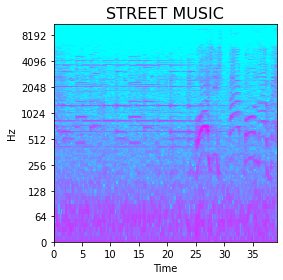

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.

DB_AIRCONDITIONER = librosa.amplitude_to_db(D_AIRCONDITIONER, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_AIRCONDITIONER, sr = sr_AIRCONDITIONER, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("AIR CONDITIONER", fontsize=16);

DB_DOGBARK = librosa.amplitude_to_db(D_DOGBARK, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_DOGBARK, sr = sr_DOGBARK, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("DOG BARK", fontsize=16);

DB_DRILLING = librosa.amplitude_to_db(D_DRILLING, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_DRILLING, sr = sr_DRILLING, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("DRILLING", fontsize=16);

DB_GUNSHOT = librosa.amplitude_to_db(D_GUNSHOT, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_GUNSHOT, sr = sr_GUNSHOT, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("GUNSHOT", fontsize=16);

DB_STREETMUSIC = librosa.amplitude_to_db(D_STREETMUSIC, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_STREETMUSIC, sr = sr_STREETMUSIC, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool');
plt.title("STREET MUSIC", fontsize=16);

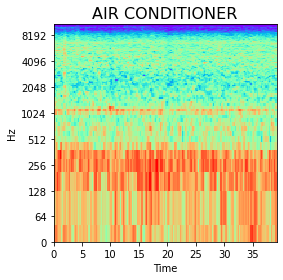

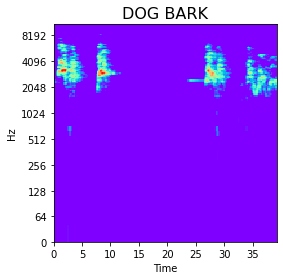

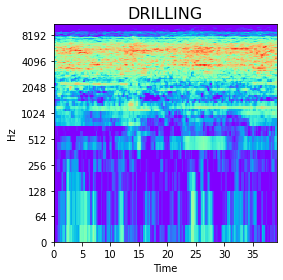

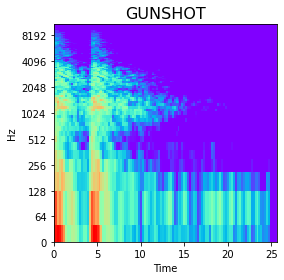

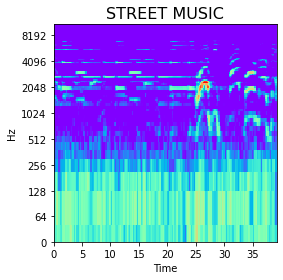

In [ ]:
# Create the Mel Spectrograms


S_AIRCONDITIONER = librosa.feature.melspectrogram(y_AIRCONDITIONER, sr=sr_AIRCONDITIONER)
S_DB_AIRCONDITIONER = librosa.amplitude_to_db(S_AIRCONDITIONER, ref=np.max)

S_DOGBARK = librosa.feature.melspectrogram(y_DOGBARK, sr=sr_DOGBARK)
S_DB_DOGBARK = librosa.amplitude_to_db(S_DOGBARK, ref=np.max)

S_DRILLING = librosa.feature.melspectrogram(y_DRILLING, sr=sr_DRILLING)
S_DB_DRILLING = librosa.amplitude_to_db(S_DRILLING, ref=np.max)

S_GUNSHOT = librosa.feature.melspectrogram(y_GUNSHOT, sr=sr_GUNSHOT)
S_DB_GUNSHOT = librosa.amplitude_to_db(S_GUNSHOT, ref=np.max)

S_STREETMUSIC = librosa.feature.melspectrogram(y_STREETMUSIC, sr=sr_STREETMUSIC)
S_DB_STREETMUSIC = librosa.amplitude_to_db(S_STREETMUSIC, ref=np.max)

# === PLOT ====

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_AIRCONDITIONER, sr = sr_AIRCONDITIONER, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("AIR CONDITIONER", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_DOGBARK, sr = sr_DOGBARK, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("DOG BARK", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_DRILLING, sr = sr_DRILLING, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("DRILLING", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_GUNSHOT, sr = sr_GUNSHOT, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("GUNSHOT", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_STREETMUSIC, sr = sr_STREETMUSIC, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow');
plt.title("STREET MUSIC", fontsize=16);

    

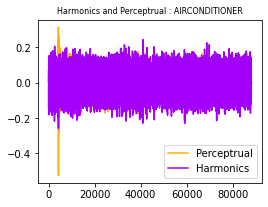

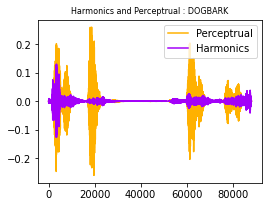

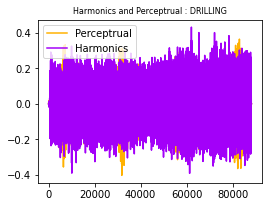

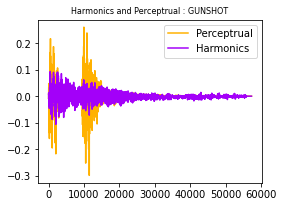

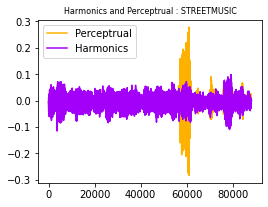

In [ ]:
#HARMONICS AND PERCEPTUAL 
y_harm_AIRCONDITIONER, y_perc_AIRCONDITIONER = librosa.effects.hpss(audio_AIRCONDITIONER)
y_harm_DOGBARK, y_perc_DOGBARK = librosa.effects.hpss(audio_DOGBARK)
y_harm_DRILLING, y_perc_DRILLING = librosa.effects.hpss(audio_DRILLING)
y_harm_GUNSHOT, y_perc_GUNSHOT = librosa.effects.hpss(audio_GUNSHOT)
y_harm_STREETMUSIC, y_perc_STREETMUSIC = librosa.effects.hpss(audio_STREETMUSIC)

plt.figure(figsize = (4, 3))
plt.plot(y_perc_AIRCONDITIONER, color = '#FFB100')
plt.plot(y_harm_AIRCONDITIONER, color = '#A300F9')
plt.title("Harmonics and Perceptrual : AIRCONDITIONER", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_DOGBARK, color = '#FFB100')
plt.plot(y_harm_DOGBARK, color = '#A300F9')
plt.title("Harmonics and Perceptrual : DOGBARK", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_DRILLING, color = '#FFB100')
plt.plot(y_harm_DRILLING, color = '#A300F9')
plt.title("Harmonics and Perceptrual : DRILLING", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_GUNSHOT, color = '#FFB100')
plt.plot(y_harm_GUNSHOT, color = '#A300F9')
plt.title("Harmonics and Perceptrual : GUNSHOT", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_STREETMUSIC, color = '#FFB100')
plt.plot(y_harm_STREETMUSIC, color = '#A300F9')
plt.title("Harmonics and Perceptrual : STREETMUSIC", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_AIRCONDITIONER, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(audio_DOGBARK, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(audio_DRILLING, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(audio_GUNSHOT, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(audio_STREETMUSIC, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1490.81170763 1457.90528578 1281.73726246 1240.4283005  1338.87490879
 1369.83972885 1397.10309407 1335.75839048 1338.93645688 1205.94927574
 1152.26437788 1142.13518753 1071.75240197 1144.3688988  1098.51497349
  868.58408924  896.61126268 1011.35791521 1240.78724217 1242.16995833
 1044.98887405  997.49269057 1052.53529927 1101.91639618 1081.9958155
 1014.55715355  892.34597806  962.27913204 1102.50671947 1249.29246359
 1228.95360498 1220.16969726 1078.95250968 1014.21189934  977.18899212
  930.43826057  901.38989469  894.89021141 1012.50042664 1014.83578695
 1024.54307407 1036.3275993   987.03838391  895.29277221  903.9248292
  939.94084308  857.32577344  916.89105217 1155.86807091 1308.31077035
 1317.07956125 1232.14947045 1079.58799561 1036.55769425 1042.2895096
 1086.06590356  926.71587458  746.26449284  892.49616299 1225.40648633
 1155.24693731 1058.64824981 1129.46833123 1110.60912588 1187.21928563
 1250.91324127 1154.72807883 1121.24274919 1179.84216285 1063.4608433

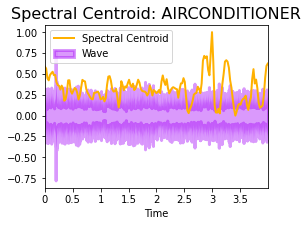

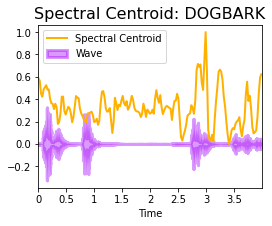

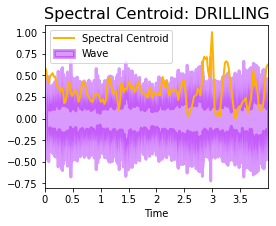

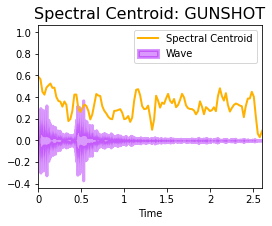

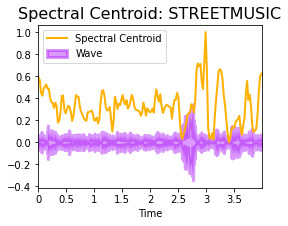

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (4, 3))
librosa.display.waveplot(audio_AIRCONDITIONER, sr=sr, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: AIRCONDITIONER", fontsize=16);

plt.figure(figsize = (4, 3))
librosa.display.waveplot(audio_DOGBARK, sr=sr, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: DOGBARK", fontsize=16);

plt.figure(figsize = (4, 3))
librosa.display.waveplot(audio_DRILLING, sr=sr, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: DRILLING", fontsize=16);

plt.figure(figsize = (4, 3))
librosa.display.waveplot(audio_GUNSHOT, sr=sr, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: GUNSHOT", fontsize=16);

plt.figure(figsize = (4, 3))
librosa.display.waveplot(audio_STREETMUSIC, sr=sr, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: STREETMUSIC", fontsize=16);

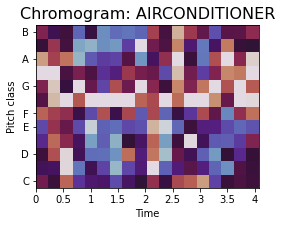

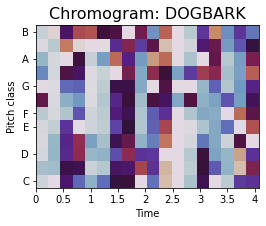

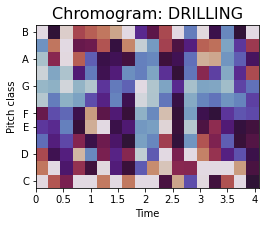

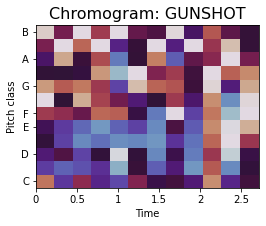

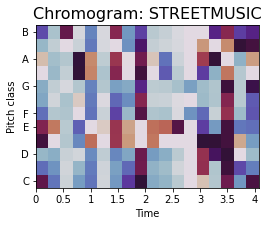

In [ ]:
#CHROMAGRAM
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000



# Chromogram Vesspa
chromagram = librosa.feature.chroma_stft(audio_AIRCONDITIONER, sr=sr_AIRCONDITIONER, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: AIRCONDITIONER", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_DOGBARK, sr=sr_DOGBARK, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: DOGBARK", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_DRILLING, sr=sr_DRILLING, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: DRILLING", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_GUNSHOT, sr=sr_GUNSHOT, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: GUNSHOT", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_STREETMUSIC, sr=sr_STREETMUSIC, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: STREETMUSIC", fontsize=16);

Text(0.5, 1.0, 'Spectral Rolloff: STREETMUSIC')

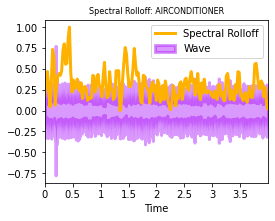

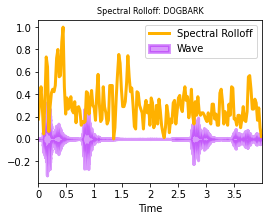

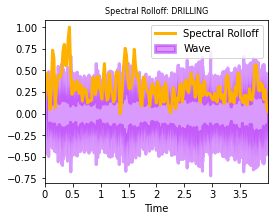

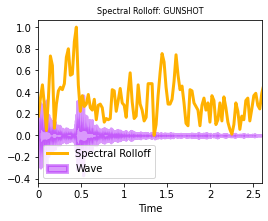

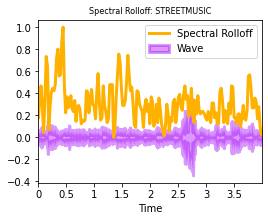

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_AIRCONDITIONER, sr=sr_AIRCONDITIONER)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_AIRCONDITIONER, sr=sr_AIRCONDITIONER, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: AIRCONDITIONER", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_DOGBARK, sr=sr_DOGBARK, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: DOGBARK", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_DRILLING, sr=sr_DRILLING, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: DRILLING", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_GUNSHOT, sr=sr_GUNSHOT, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: GUNSHOT", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_STREETMUSIC, sr=sr_STREETMUSIC, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: STREETMUSIC", fontsize=8)